In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Covid-19_SG.csv')

# Convert date strings to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Display the first few rows to verify
print(df.head())



            Daily Confirmed  False Positives Found  Cumulative Confirmed  \
Date                                                                       
2020-01-23                1                    NaN                     1   
2020-01-24                2                    NaN                     3   
2020-01-25                1                    NaN                     4   
2020-01-26                0                    NaN                     4   
2020-01-27                1                    NaN                     5   

            Daily Discharged  Passed but not due to COVID  \
Date                                                        
2020-01-23                 0                            0   
2020-01-24                 0                            0   
2020-01-25                 0                            0   
2020-01-26                 0                            0   
2020-01-27                 0                            0   

            Cumulative Discharged  Disc

In [9]:
print(df.columns)

Index(['Daily Confirmed', 'False Positives Found', 'Cumulative Confirmed',
       'Daily Discharged', 'Passed but not due to COVID',
       'Cumulative Discharged', 'Discharged to Isolation',
       'Still Hospitalised', 'Daily Deaths', 'Cumulative Deaths',
       'Tested positive demise', 'Daily Imported', 'Daily Local transmission',
       'Local cases residing in dorms MOH report',
       'Local cases not residing in doms MOH report',
       'Intensive Care Unit (ICU)', 'General Wards MOH report',
       'In Isolation MOH report', 'Total Completed Isolation MOH report',
       'Total Hospital Discharged MOH report',
       'Requires Oxygen Supplementation or Unstable', 'Linked community cases',
       'Unlinked community cases', 'Phase', 'Cumulative Vaccine Doses',
       'Cumulative Individuals Vaccinated',
       'Cumulative Individuals Vaccination Completed',
       'Perc population completed at least one dose',
       'Perc population completed vaccination', 'Sinovac vaccine dos

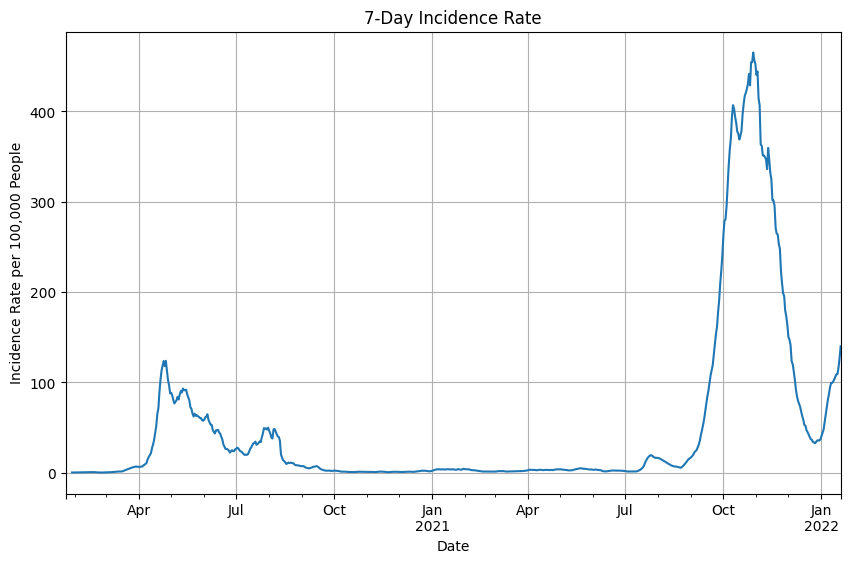

In [10]:
# Population of Singapore (in millions)
population = 5.686 * 1e6

df['7_Day_Incidence'] = df['Daily Confirmed'].rolling(window=7).sum() * 100000 / population

plt.figure(figsize=(10, 6))
df['7_Day_Incidence'].plot(title='7-Day Incidence Rate')
plt.xlabel('Date')
plt.ylabel('Incidence Rate per 100,000 People')
plt.grid()
plt.show()

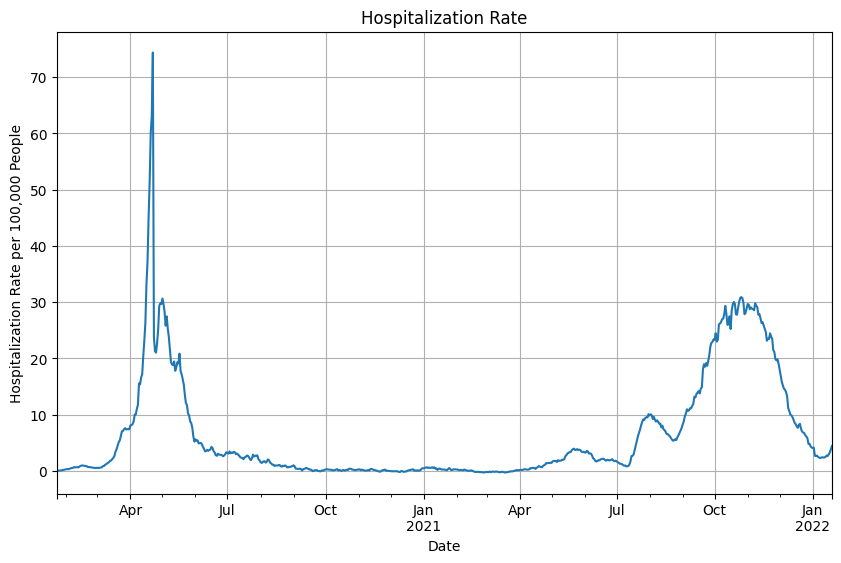

In [11]:
# Calculate the hospitalization rate per 100,000 people
df['Hospitalization_Rate'] = df['Still Hospitalised'] / population * 100000

plt.figure(figsize=(10, 6))
df['Hospitalization_Rate'].plot(title='Hospitalization Rate')
plt.xlabel('Date')
plt.ylabel('Hospitalization Rate per 100,000 People')
plt.grid()
plt.show()


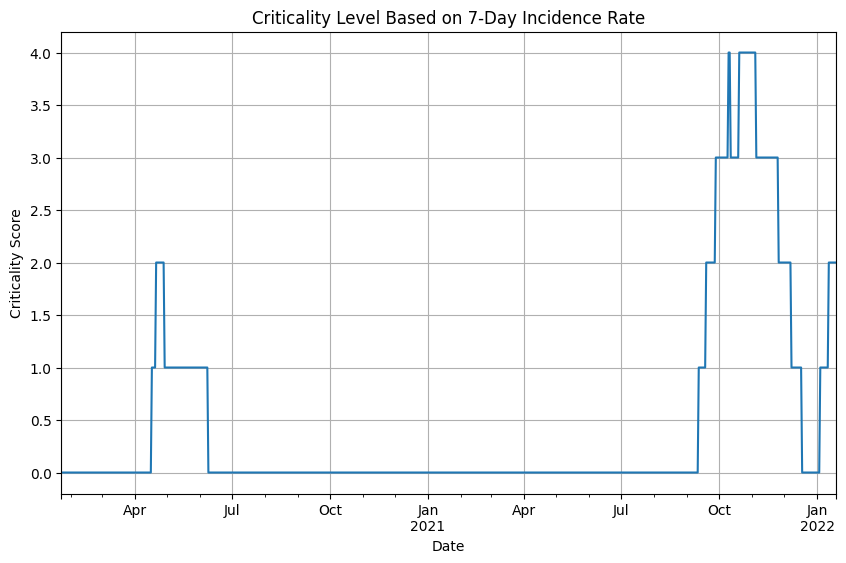

In [12]:
# Define criticality scoring function
def calculate_criticality(incidence):
    if incidence > 400:
        return 4
    elif incidence > 200:
        return 3
    elif incidence > 100:
        return 2
    elif incidence > 50:
        return 1
    else:
        return 0

df['Criticality'] = df['7_Day_Incidence'].apply(calculate_criticality)

plt.figure(figsize=(10, 6))
df['Criticality'].plot(title='Criticality Level Based on 7-Day Incidence Rate')
plt.xlabel('Date')
plt.ylabel('Criticality Score')
plt.grid()
plt.show()

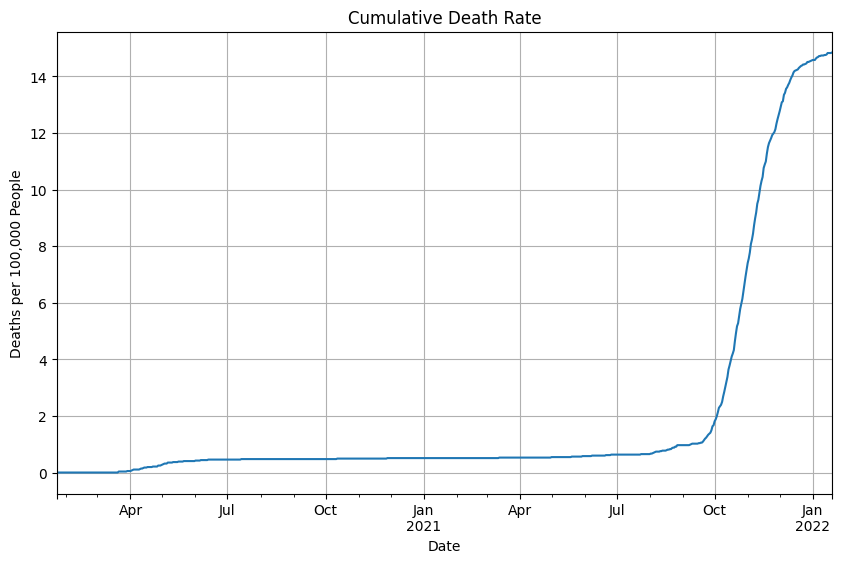

In [13]:
# Calculate cumulative death rate per 100,000 population
df['Cumulative_Death_Rate'] = (df['Cumulative Deaths'] / population) * 100000

# Plot cumulative death rate
plt.figure(figsize=(10, 6))
df['Cumulative_Death_Rate'].plot(title='Cumulative Death Rate')
plt.xlabel('Date')
plt.ylabel('Deaths per 100,000 People')
plt.grid()
plt.show()


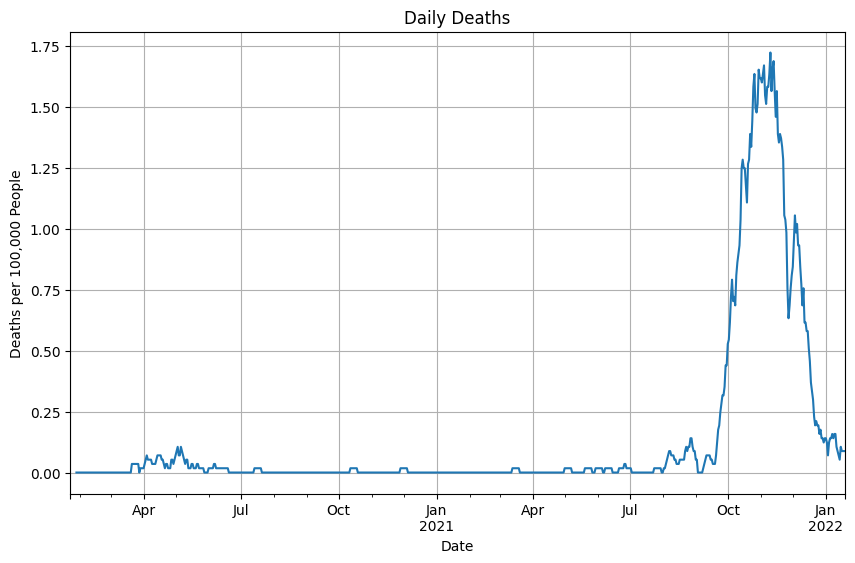

In [14]:
df["Daily Deaths"] = df["Daily Deaths"].rolling(window=7).sum() * 100000 / population
plt.figure(figsize=(10, 6))
df['Daily Deaths'].plot(title='Daily Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths per 100,000 People')
plt.grid()
plt.show()